In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

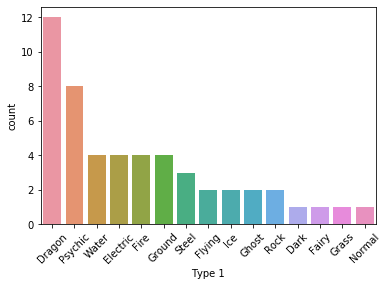

In [7]:
df = pd.read_csv('pokemon_data.csv')
legendary_df = df[df['Legendary'] == True]
plt.figure()
sns.countplot(data = legendary_df, x = 'Type 1', order = legendary_df['Type 1'].value_counts().index)
plt.xticks(rotation = 45)

In [2]:
pkmn_gens_i_vi = pd.read_csv('pokemon_data.csv')
pkmn_gens_vii_viii = pd.read_csv('pokemon-data-gens-vii-viii.csv')

In [3]:
pkmn_gens_i_vi.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,False


In [4]:
pkmn_gens_vii_viii.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical
0,722,Rowlet,Grass,Flying,68,55,55,50,50,42,7,False,False
1,723,Dartrix,Grass,Flying,78,75,75,70,70,52,7,False,False
2,724,Decidueye,Grass,Ghost,78,107,75,100,100,70,7,False,False
3,725,Litten,Fire,NaN,45,65,40,60,40,70,7,False,False
4,726,Torracat,Fire,NaN,65,85,50,80,50,90,7,False,False


In [5]:
print(pkmn_gens_i_vi.describe())

                #          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750   69.258750   79.001250   73.842500   72.820000   71.902500   
std    208.343798   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.000000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    184.750000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    364.500000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    539.250000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    721.000000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000

In [6]:
print(pkmn_gens_i_vi.groupby('Legendary').size())
print('')
print(pkmn_gens_i_vi.groupby('Mythical').size())

Legendary
False    749
True      51
dtype: int64

Mythical
False    776
True      24
dtype: int64


In [7]:
sns.set()

In [8]:
# sns.pairplot(pkmn_gens_i_vi.iloc[0:,4:11], hue = 'Generation', palette = 'deep');

In [9]:
stat_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
pkmn_gens_i_vi['Base Stat Total'] = pkmn_gens_i_vi.iloc[:,4:10].sum(axis = 1)
pkmn_gens_vii_viii['Base Stat Total'] = pkmn_gens_vii_viii.iloc[:,4:10].sum(axis = 1)

In [10]:
pkmn_gens_i_vi.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical,Base Stat Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,False,309


In [11]:
pkmn_gens_vii_viii.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical,Base Stat Total
0,722,Rowlet,Grass,Flying,68,55,55,50,50,42,7,False,False,320
1,723,Dartrix,Grass,Flying,78,75,75,70,70,52,7,False,False,420
2,724,Decidueye,Grass,Ghost,78,107,75,100,100,70,7,False,False,530
3,725,Litten,Fire,NaN,45,65,40,60,40,70,7,False,False,320
4,726,Torracat,Fire,NaN,65,85,50,80,50,90,7,False,False,420


In [12]:
new_order = list(pkmn_gens_i_vi.columns[0:4]) + ['Base Stat Total'] + stat_cols + list(pkmn_gens_i_vi.columns[10:-1])
pkmn_gens_i_vi = pkmn_gens_i_vi[new_order]
pkmn_gens_vii_viii = pkmn_gens_vii_viii[new_order]

In [13]:
pkmn_gens_i_vi.head()

,#,Name,Type 1,Type 2,Base Stat Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False


In [18]:
# from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [19]:
X1 = pkmn_gens_i_vi[['#', 'Base Stat Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
Y1 = pkmn_gens_i_vi['Legendary']

X2 = pkmn_gens_vii_viii[['#', 'Base Stat Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
Y2 = pkmn_gens_vii_viii['Legendary']

In [35]:
model = GaussianNB()
model.fit(X1, Y1)
test = model.predict(X2) == np.array(Y2)

In [44]:
hist = np.histogram(test)
hist[0][-1]/(hist[0][-1] + hist[0][0])

0.8911917098445595

In [50]:
table = np.array([np.array(pkmn_gens_vii_viii['#']), np.array(pkmn_gens_vii_viii['Name']), model.predict(X2), np.array(Y2)]).transpose()

In [51]:
table

array([[722, 'Rowlet', False, False],
       [723, 'Dartrix', False, False],
       [724, 'Decidueye', False, False],
       [725, 'Litten', False, False],
       [726, 'Torracat', False, False],
       [727, 'Incineroar', False, False],
       [728, 'Popplio', False, False],
       [729, 'Brionne', False, False],
       [730, 'Primarina', False, False],
       [731, 'Pikipek', False, False],
       [732, 'Trumbeak', False, False],
       [733, 'Toucannon', False, False],
       [734, 'Yungoos', False, False],
       [735, 'Gumshoos', False, False],
       [736, 'Grubbin', False, False],
       [737, 'Charjabug', False, False],
       [738, 'Vikavolt', False, False],
       [739, 'Crabrawler', False, False],
       [740, 'Crabominable', False, False],
       [741, 'Oricorio', False, False],
       [742, 'Cutiefly', False, False],
       [743, 'Ribombee', False, False],
       [744, 'Rockruff', False, False],
       [745, 'LycanrocMidday Form', False, False],
       [745, 'LycanrocMidni